# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

<p style="color:#006600;">New traffic rules and fines were implemented in October 2016. As an analyst at the General Department of Traffic under the Ministry of Interior, you are a part of a team that tracks traffic accidents and gives policy recommendations that are best to help reduce injuries and casualties on the road. Your report should be geared toward non-technical executives with the General Department and you will use the provided data and outside research to make recommendations about how the General Department might work to reduce traffic accidents in a region of your choice.</p>


## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

<p style="color:#006600;">Analysis and extract information from two unclean datasets by using Python to clean the data and EDA and visualiz it also I will use statistics. The findings are: Riyadh, Makkah and Eastern are the trend in number of driving licenses and traffic accidents and they have the highest population in Saudi Arabia, There is a strong relationship between the number of licenses issued and the number of accidents,also I mantioned the impact of Saher system and metros they redused the number of traffic accidents</p>

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [53]:
#Imports
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [54]:
#Code
accidents= pd.read_csv('saudi-arabia-traffic-accidents-2008.csv', delimiter=';')
licenses= pd.read_csv('saudi-arabia-driving-licenses-2004-2008.csv', delimiter=';')

In [55]:

del accidents['Unnamed: 0.1']
del accidents['Unnamed: 0']
del licenses['Unnamed: 0']


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [56]:
#Code
licenses.columns = [c.replace(' ', '_') for c in licenses.columns]
accidents.columns = [c.replace(' ', '_') for c in accidents.columns]

display (licenses.head(10))
display (accidents.head(10))

,Year,Administritive_Area,Driving_Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

<h3 style="color:#cc3300;">Answer:</h3>
<p style="color:#006600;">
licenses dataset:
<ul style="color:#006600;">
<li>Year: The year on which a number of driving licenses were issued</li>
 <li>Administritive_Area: The region on which of driving licenses were issued</li>
 <li>Driving_Liceses: The number of driving licenses were issued on a year at a region</li>
 <li>geo_point_2d: longtitude and altitude of the region</li>
</ul>
<p style="color:#006600;">
accidents dataset:
<ul style="color:#006600;">
 <li>Year: The year on which a record of accidents took place</li>
 <li>Region: The region on which a record of accidents took place</li>
 <li>Indicator: The indicator of the accidents(number of casualties dead, number of casualties injured, number of accidents)</li>
 <li>Value: The number of Indicator for each value in it</li>
 <li>geo_point_2d: longtitude and altitude of the region</li>
</ul>

#### 4a. How complete is the data?

Investigate missing values etc.

In [6]:
#Code
print('Driving Licenses:\n')
print(licenses.isnull().sum())
print('\nTraffic Accidents:\n')
print(accidents.isnull().sum())

Driving Licenses:

Year                    0
Administritive_Area     0
Driving_Liceses         0
geo_point_2d           25
dtype: int64

Traffic Accidents:

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [63]:
#Code
#Yes the highst value for region is Total!
print(accidents.max())
print( licenses.max().max())

Year                              (2017)
Region                             Total
Indicator    No. of Casualties - Injured
Value                             99925n
dtype: object
Total


In [64]:
print(accidents.min().min())
print( licenses.min().min())

(2016)
(1993)


#### 5. What are your data types? 
Display the data types of each feature. 

In [73]:
#code
licenses.info()
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null object
Administritive_Area    350 non-null object
Driving_Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: object(4)
memory usage: 11.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: object(5)
memory usage: 3.4+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<h3 style="color:#cc3300;">Answer:</h3>
<p style="color:#006600;">Yes, all are object type even the features that should be numeric such as year, licenses, value and geo_point 2d ! </p>

 

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [74]:
#code

# accidents dataset :

accidents['Year']= accidents.Year.apply(lambda x : x.replace('(',''))
accidents['Year']= accidents.Year.apply(lambda x : x.replace(')',''))
accidents['Year'] = pd.to_numeric(accidents['Year'])

accidents['Value']= accidents.Value.apply(lambda x : x.replace('n', ''))
accidents['Value'] = pd.to_numeric(accidents['Value'])

accidents['geo_point_2d'].fillna('0.0, 0.0', inplace=True)


##############################################################################
# licenses dataset :

licenses['Year']= licenses.Year.apply(lambda x : x.replace('(',''))
licenses['Year']= licenses.Year.apply(lambda x : x.replace(')',''))
licenses['Year'] = pd.to_numeric(licenses['Year'])

licenses['Driving_Liceses']= licenses.Driving_Liceses.apply(lambda x : x.replace('n', ''))
licenses['Driving_Liceses'] = pd.to_numeric(licenses['Driving_Liceses'])

licenses['geo_point_2d'].fillna('0.0, 0.0', inplace=True)


In [75]:
#check the type of data
accidents.info()
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    84 non-null object
dtypes: int64(2), object(3)
memory usage: 3.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null int64
Administritive_Area    350 non-null object
Driving_Liceses        350 non-null int64
geo_point_2d           350 non-null object
dtypes: int64(2), object(2)
memory usage: 11.0+ KB


- Make new columns `x` and `y` using `geo_point_2d`

In [76]:
#code
licenses['x']= licenses.geo_point_2d.apply(lambda x : str(x).split(',')[0])
licenses['x'] = pd.to_numeric(licenses['x'])

licenses['y']= licenses.geo_point_2d.apply(lambda x : str(x).split(',')[1])
licenses['y'] = pd.to_numeric(licenses['y'])
########

accidents['x']= accidents.geo_point_2d.apply(lambda x : str(x).split(',')[0])
accidents['x'] = pd.to_numeric(accidents['x'])

accidents['y']= accidents.geo_point_2d.apply(lambda x : str(x).split(',')[1])
accidents['y'] = pd.to_numeric(accidents['y'])

del accidents['geo_point_2d']
del licenses['geo_point_2d']


In [77]:
display (licenses.head())
display (accidents.head())

,Year,Administritive_Area,Driving_Liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


- Fix any individual values preventing other columns from being the appropriate type.

In [78]:
#code

accidents['Region']= accidents.Region.replace('Eastern Region', 'Eastern')
accidents['Region']= accidents.Region.replace('Asir','Assir')
accidents['Region']= accidents.Region.replace('Qassim', 'Al-Qaseem')
accidents['Region']= accidents.Region.replace('Al-Baaha', 'Al-Baha' )


- Finish your data modifications by making sure the columns are now typed appropriately.

In [79]:
#code
accidents.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

In [80]:
licenses.dtypes

Year                     int64
Administritive_Area     object
Driving_Liceses          int64
x                      float64
y                      float64
dtype: object

- Display the data types again to confirm they are correct.

In [81]:
#Code:
accidents.info()
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
Year         84 non-null int64
Region       84 non-null object
Indicator    84 non-null object
Value        84 non-null int64
x            84 non-null float64
y            84 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Year                   350 non-null int64
Administritive_Area    350 non-null object
Driving_Liceses        350 non-null int64
x                      350 non-null float64
y                      350 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 13.8+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [82]:
#code

accidents.rename(columns={       
        'Year':'year',
        'Region':'region',
        'Indicator':'indicator',
        'Value':'no._of_ndicators',
        'geo_point_2d':'geo_point_2d',
        'x':'accident_longitude',
        'y':'accident_latitude',
         }, inplace=True)

licenses.rename(columns={
        'Year':'year',
        'Administritive_Area':'region',
        'Driving_Liceses':'no._of_liceses',
        'geo_point_2d':'geo_point_2d',
        'x':'license_longitude',
        'y':'license_latitude',
         }, inplace=True)


display (accidents.columns)
display (licenses.columns)


Index(['year', 'region', 'indicator', 'no._of_ndicators', 'accident_longitude',
       'accident_latitude'],
      dtype='object')

Index(['year', 'region', 'no._of_liceses', 'license_longitude',
       'license_latitude'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


| Feature            | Type   |Dataset   |Description |
|--------------------|--------|----------|------------|
|year|int64|licenses|The year on which a number of driving licenses were issued|
|region|object|licenses|The region on which a number of driving licenses were issued|
|no._of_liceses|int64|licenses|The number of driving licenses were issued on a year at a region|
|license_longitude|float64|licenses|The longtitude of the region|
|license_latitude|float64|licenses|The altitude of the region|
|year|int64|accidents|The year on which a record of accidents took place|
|region|object|accidents|The region on which a record of accidents took place|
|indicator|object|accidents|The indicator of the accidents(number of casualties dead, number of casualties injured, number of accidents)|
|no._of_ndicators|int64|accidents |The amount of the indicator|
|accident_longitude|float64 |accidents |The longtitude of the region|
|accident_latitude|float64 |accidents |The altitude of the region|


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [85]:
#code

accidents.drop(accidents.index[accidents['region'] == 'Total'], inplace = True)
licenses.drop(licenses.index[licenses['region'] == 'Total'], inplace = True)

In [86]:
print (accidents.region.unique(),'\n')
print (licenses.region.unique())


['Makkah' 'Eastern' 'Tabouk' 'Hail' 'Northern Boarder' 'Jazan' 'Al-Jouf'
 'Al-Baha' 'Riyadh' 'Madinah' 'Al-Qaseem' 'Najran' 'Assir'] 

['Makkah' 'Madinah' 'Al-Qaseem' 'Eastern' 'Assir' 'Tabouk' 'Hail'
 'Northern Boarder' 'Jazan' 'Najran' 'Al-Baha' 'Al-Jouf' 'Riyadh']


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

<p style="color:#006600;">Accident data is long because ot has a column  (indicator) for possible variable types & a column for the values of those variables(no._of_ndicators), and License data is wide because it has a column for each variable.</p>

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [89]:
#code
accidents=accidents.pivot_table(index = ['year', 'region'], columns ='indicator', values='no._of_ndicators')

accidents.head()

indicator       No. of Accidents  No. of Casualties - Dead  \
year region                                                  
2016 Al-Baha                3618                       185   
     Al-Jouf               10212                       245   
     Al-Qaseem             25664                       397   
     Assir                 32684                       983   
     Eastern              101619                      1113   

indicator       No. of Casualties - Injured  
year region                                  
2016 Al-Baha                           1227  
     Al-Jouf                            920  
     Al-Qaseem                         1513  
     Assir                             2541  
     Eastern                           4893

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [93]:
#code

combined = pd.merge(licenses,accidents, how= 'outer' , on=['region', 'year'])

combined.shape
combined.head(5)

,year,region,no._of_liceses,license_longitude,license_latitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2012,Makkah,143954,21.628963,41.26369,NaN,NaN,NaN
1,1994,Makkah,75349,21.628963,41.26369,NaN,NaN,NaN
2,1998,Makkah,86082,21.628963,41.26369,NaN,NaN,NaN
3,2004,Makkah,86636,21.628963,41.26369,NaN,NaN,NaN
4,2005,Makkah,65099,21.628963,41.26369,NaN,NaN,NaN


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [94]:
#code
combined.to_csv('combined.csv', header = False, index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [95]:
#Code:
display(combined['year'].describe())
display(combined['no._of_liceses'].describe())
display(combined['license_longitude'].describe())
display(combined['license_latitude'].describe())
display(combined['No. of Casualties - Dead'].describe())
display(combined['No. of Casualties - Injured'].describe())
display(combined['No. of Accidents'].describe())


count     325.000000
mean     2005.000000
std         7.222222
min      1993.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: year, dtype: float64

count       325.000000
mean      28915.347692
std       47419.058819
min         915.000000
25%        4846.000000
50%       10267.000000
75%       25423.000000
max      495307.000000
Name: no._of_liceses, dtype: float64

count    325.000000
mean      23.810447
std        4.197987
min       17.207231
25%       20.148406
50%       23.288331
75%       27.400846
max       30.197075
Name: license_longitude, dtype: float64

count    325.000000
mean      42.602789
std        3.254196
min       37.259858
25%       41.263690
50%       41.817119
75%       43.343000
max       50.147830
Name: license_latitude, dtype: float64

count      26.000000
mean      635.384615
std       549.783381
min       112.000000
25%       241.250000
50%       415.500000
75%       929.250000
max      2243.000000
Name: No. of Casualties - Dead, dtype: float64

count       26.000000
mean      2743.038462
std       2922.641127
min        374.000000
25%        923.000000
50%       1618.500000
75%       3784.000000
max      12383.000000
Name: No. of Casualties - Injured, dtype: float64

count        26.000000
mean      38225.692308
std       46493.705035
min        1414.000000
25%       10276.250000
50%       16050.500000
75%       30981.250000
max      145541.000000
Name: No. of Accidents, dtype: float64

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [105]:
#code

def std_manually(list_):
    x=[]
    mean= sum(list_)/len(list_)
    for i in list_:
        n=i-mean
        x.append(n*n)
        
    total=sum(x)
    n=len(list_)
    variance=total/n
    std= variance**(1/2)
    return std


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [111]:
#Code:

sd = {'year':std_manually(combined['year']) ,
     'no._of_liceses':std_manually(combined['no._of_liceses']) ,
     'license_longitude':std_manually(combined['license_longitude']) , 
     'license_latitude':std_manually(combined['license_latitude']) ,
     'No. of Accidents':std_manually(combined['No. of Accidents'].notnull()) ,
     'No. of Casualties - Dead':std_manually(combined['No. of Casualties - Dead'].notnull()) ,
     'No. of Casualties - Injured':std_manually(combined['No. of Casualties - Injured'].notnull())
     }
print(sd)

{'year': 7.211102550927978, 'no._of_liceses': 47346.0502174464, 'license_longitude': 4.191524025811861, 'license_latitude': 3.2491853051316912, 'No. of Accidents': 0.27129319932501006, 'No. of Casualties - Dead': 0.27129319932501006, 'No. of Casualties - Injured': 0.27129319932501006}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<h3 style="color:#cc3300;">Answer:</h3>
<p style="color:#006600;">Yes, They are matching and the cell below is the prove 

In [112]:
test =[1,2,3,4,5] 
print(std_manually(test))
print (np.std(test))


1.4142135623730951
1.4142135623730951


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [114]:
#Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

masked1= combined.mask((1992< combined['year'])& (combined['year'] > 2018))
#masked1.head()
highst_region1= masked1.loc[masked1['no._of_liceses'] == 495307.000000, 'region'].iloc[0]
lowest_region1=  masked1.loc[masked1['no._of_liceses'] == 915.000000, 'region'].iloc[0]
print (f'Highest Driving Licenses in {highst_region1} region and lowest region is {lowest_region1}')

# masked1.describe()
# masked1.min()

Highest Driving Licenses in Riyadh region and lowest region is Tabouk


In [115]:

#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

masked2= combined.mask((2015< combined['year'])& (combined['year'] > 2018))
highst_region2= masked2.loc[masked2['No. of Accidents'] == 145541.000000, 'region'].iloc[0]
lowest_region2=  masked2.loc[masked2['No. of Accidents'] == 1414.000000 , 'region'].iloc[0]
#print (masked2.describe())

print ('\n',f'Highest Traffic Accidents in {highst_region2} region and lowest region is {lowest_region2}')



 Highest Traffic Accidents in Makkah region and lowest region is Al-Baha


In [128]:
#What are the regions that have more Driving Licenses issued in each year than the year average?

df=pd.DataFrame()
df['sum']= combined.groupby(['year','region'])['no._of_liceses'].sum()
df.reset_index(inplace=True)

df2=pd.DataFrame()
df2['mean']=combined.groupby('year')['no._of_liceses'].mean()
df2.reset_index(inplace=True)
# print (df2)

df3= pd.merge(df, df2,how='left', on='year')
df3.reset_index(inplace=True)

df4=df3.mask(df3['sum']<df3['mean']).groupby(['year','region'])['sum'].count()
final=pd.DataFrame(df4)
print ('regions are:')
display(final)

regions are:


sum
year   region        
1993.0 Al-Qaseem    1
       Makkah       1
       Riyadh       1
1994.0 Al-Qaseem    1
       Makkah       1
       Riyadh       1
1995.0 Al-Qaseem    1
       Makkah       1
       Riyadh       1
1996.0 Al-Qaseem    1
       Makkah       1
       Riyadh       1
1997.0 Eastern      1
       Makkah       1
       Riyadh       1
1998.0 Eastern      1
       Makkah       1
       Riyadh       1
1999.0 Eastern      1
       Makkah       1
       Riyadh       1
2000.0 Eastern      1
       Makkah       1
       Riyadh       1
2001.0 Eastern      1
       Makkah       1
2002.0 Eastern      1
       Makkah       1
       Riyadh       1
2003.0 Eastern      1
...               ...
2008.0 Eastern      1
       Makkah       1
       Riyadh       1
2009.0 Eastern      1
       Makkah       1
       Riyadh       1
2010.0 Al-Qaseem    1
       Eastern      1
       Makkah       1
       Riyadh       1
2011.0 Eastern      1
       Makkah       1
2012.0 Eastern      1
       Makkah       1
2013.0 Eastern      1
       Makkah       1
       Riyadh       1
2014.0 Eastern      1
       Makkah       1
       Riyadh       1
2015.0 Assir        1
       Eastern      1
       Makkah       1
2016.0 Eastern      1
       Hail         1
       Makkah       1
       Riyadh       1
2017.0 Eastern      1
       Makkah       1
       Riyadh       1

[74 rows x 1 columns]

In [129]:

#What are the regions that have more Traffic Accidents happened in each year than the year average?

df5=pd.DataFrame()
df5['sum']= combined.groupby(['year','region'])['No. of Accidents'].sum()
df5.reset_index(inplace=True)

df6=pd.DataFrame()
df6['mean']=combined.groupby('year')['No. of Accidents'].mean()
df6.reset_index(inplace=True)


df7= pd.merge(df5, df6,how='left', on='year')
df7.reset_index(inplace=True)

df8=df7.mask((df7['year']<2016)|(df7['sum']<df7['mean'])).groupby(['year','region'])['sum'].count()
final2=pd.DataFrame(df8)
print ('regions are:')
display( final2)

regions are:


sum
year   region      
2016.0 Eastern    1
       Makkah     1
       Riyadh     1
2017.0 Eastern    1
       Makkah     1
       Riyadh     1

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

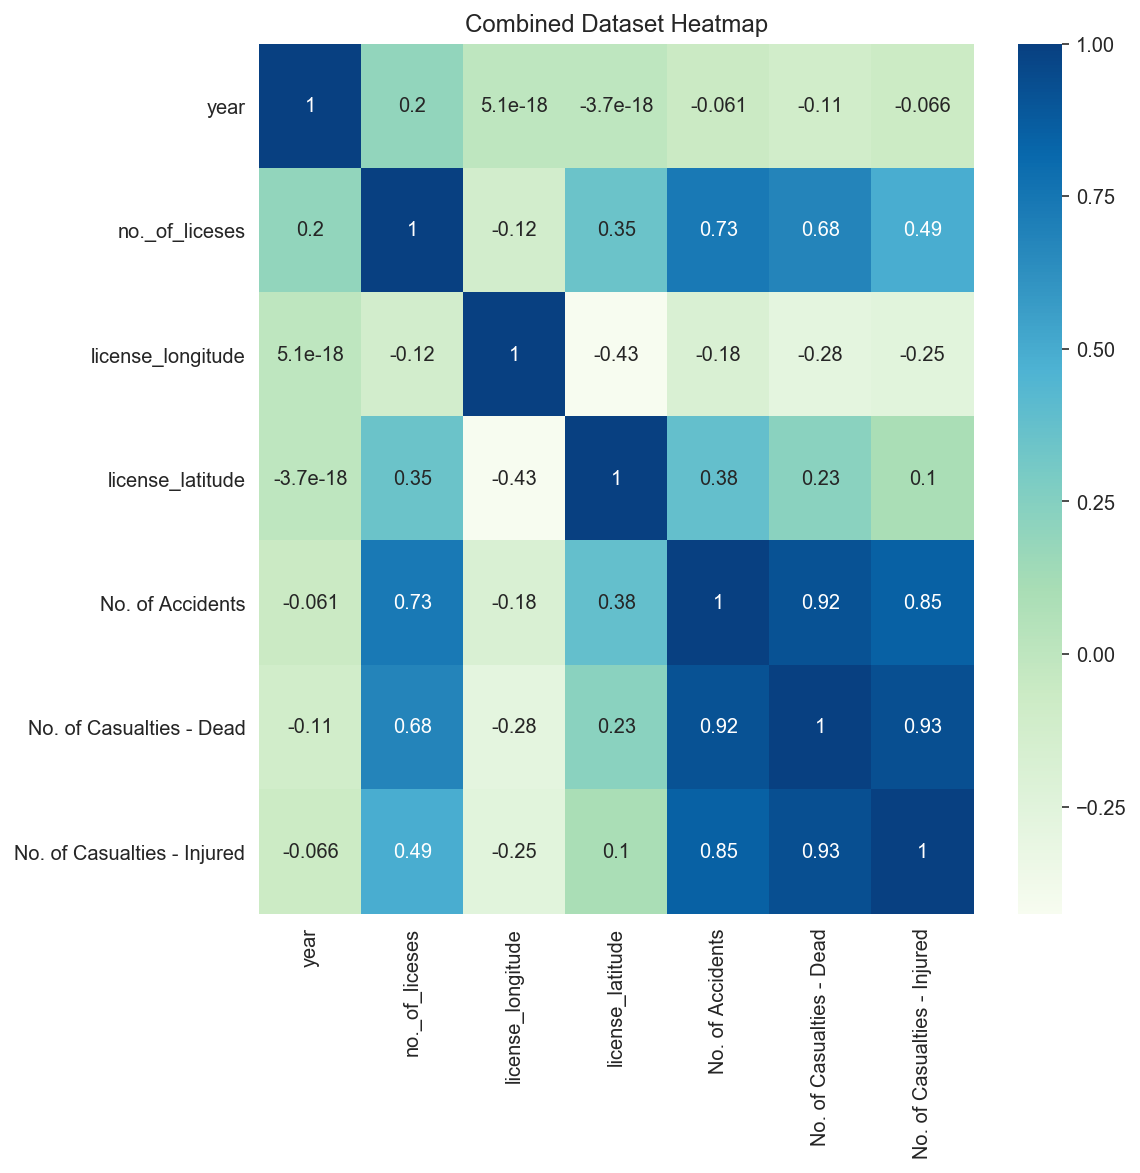

In [130]:
plt.figure(figsize=(8,8))
plt.title('Combined Dataset Heatmap')
sns.heatmap(combined.corr(), annot=True,cmap='GnBu')
plt.show()

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [31]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color='c') # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

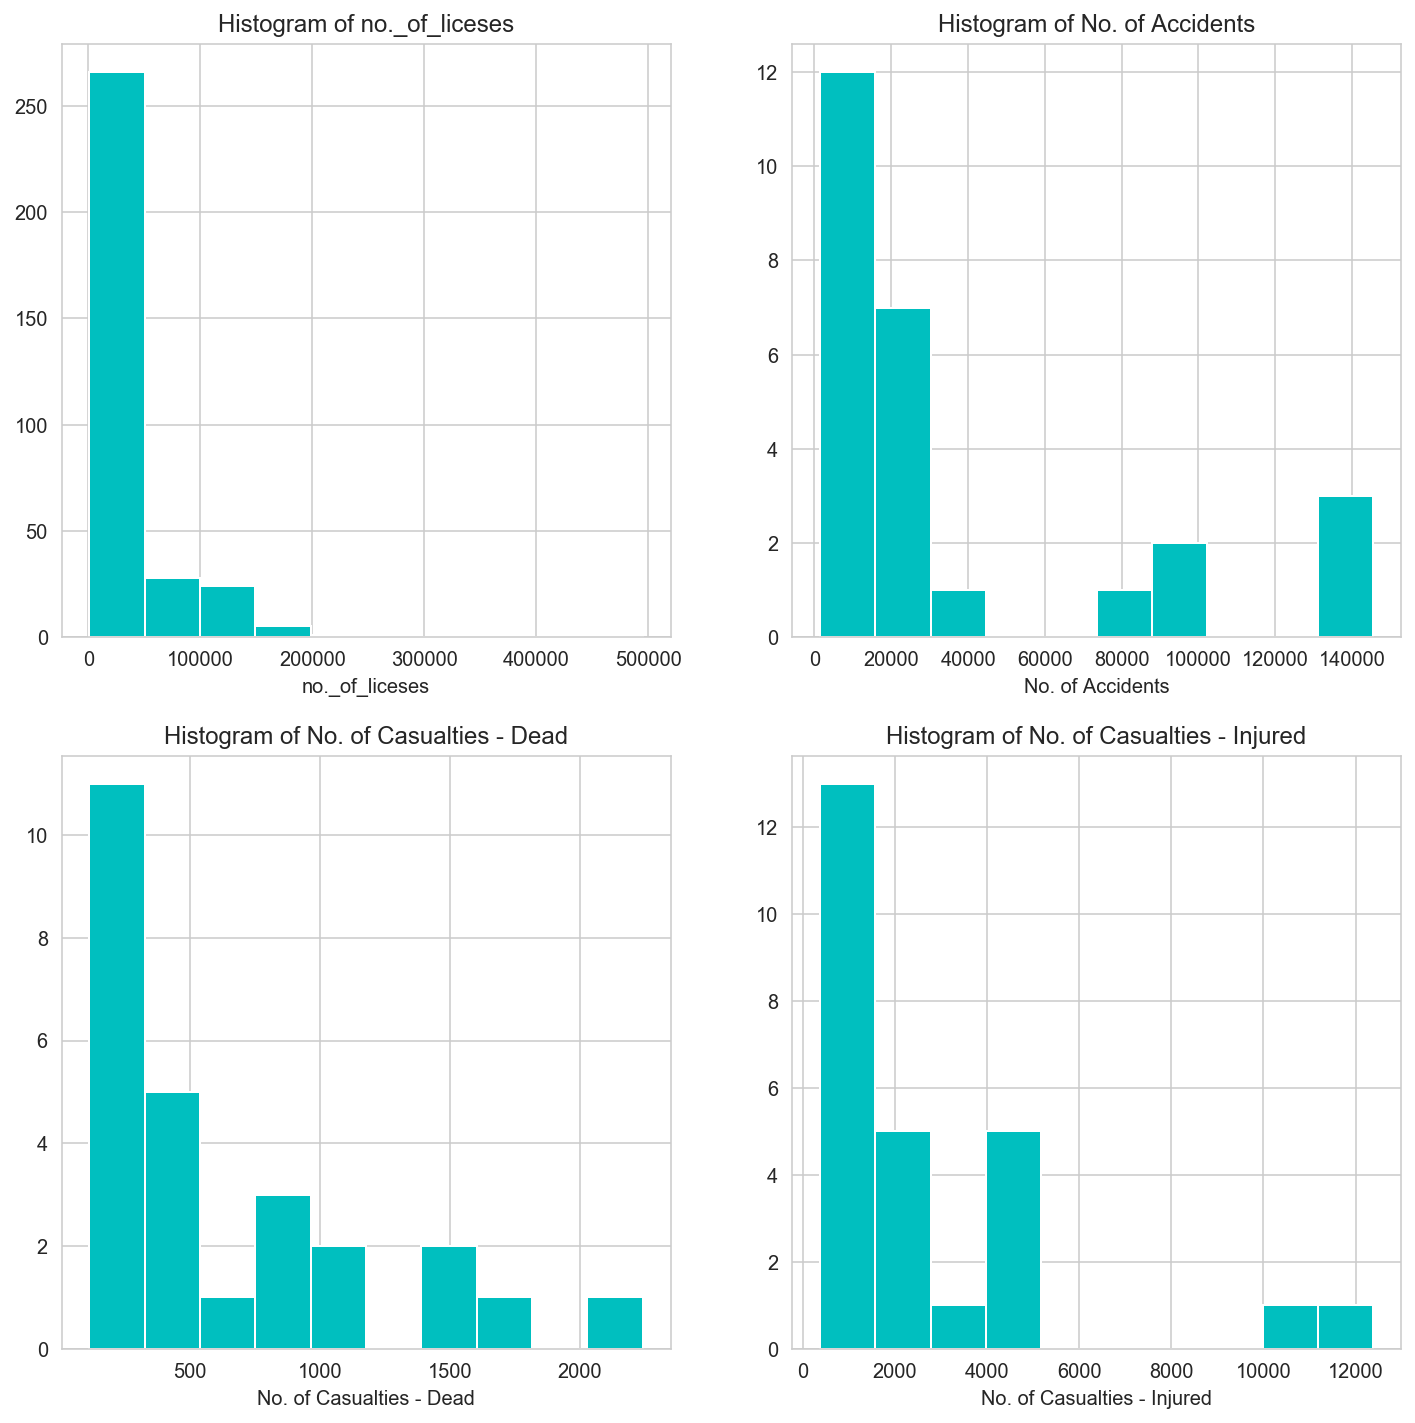

In [131]:
# Code

subplot_histograms(combined, ['no._of_liceses','No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured'],
                   ['Histogram of no._of_liceses','Histogram of No. of Accidents','Histogram of No. of Casualties - Dead','Histogram of No. of Casualties - Injured'],
                   ['no._of_liceses','No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured'])


#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'Driving Licenses vs. Traffic Accidents for 2017')

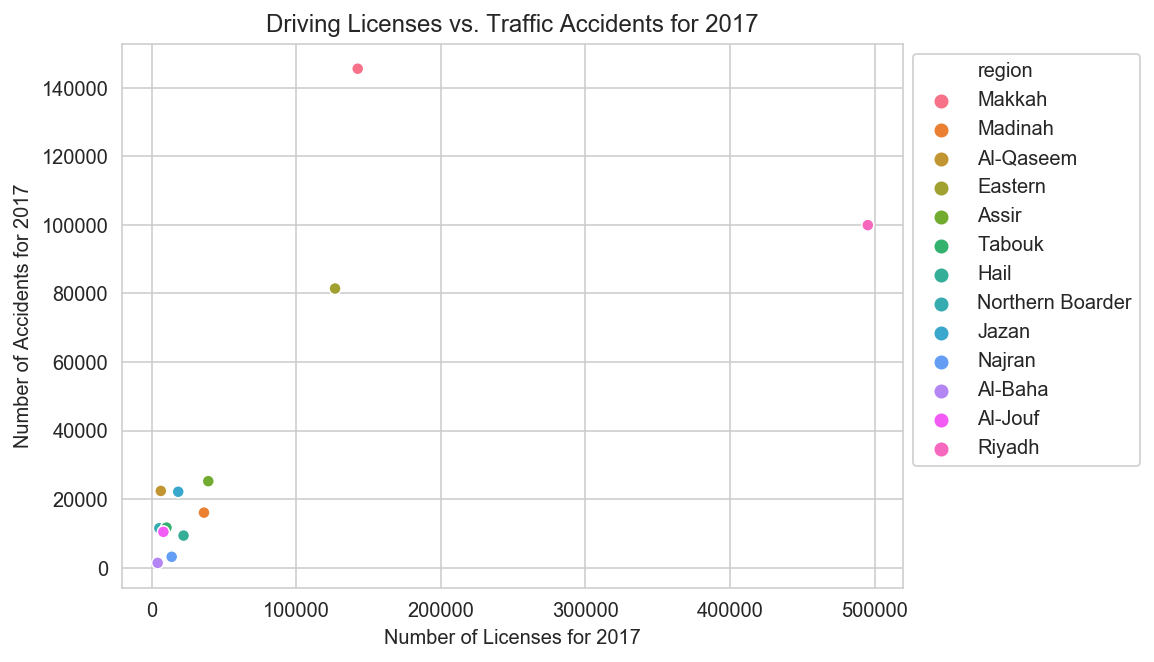

In [136]:
#Driving Licenses vs. Traffic Accidents for 2017
import seaborn as sns

sns.set_style('whitegrid')
y2017_acci = combined.loc[combined['year']==2017 ,'No. of Accidents' ]
y2017_lice = combined.loc[combined['year']==2017 , 'no._of_liceses']

fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(y=y2017_acci, x=y2017_lice, sizes=(10, 200),
                     legend="full",hue= 'region',data=combined)
plt.legend(bbox_to_anchor=(1,1), loc=2)

ax.set_ylabel('Number of Accidents for 2017')
ax.set_xlabel('Number of Licenses for 2017')
ax.set_title("Driving Licenses vs. Traffic Accidents for 2017")

Text(0.5, 1.0, 'Driving Licenses vs. Traffic Accidents for 2016')

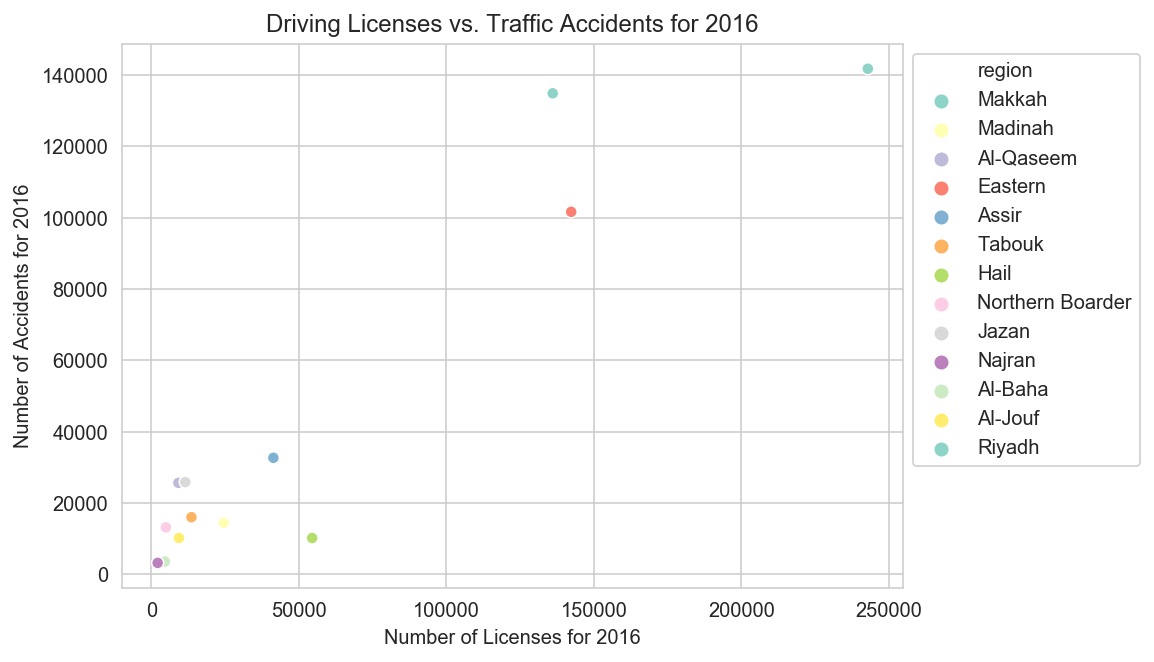

In [137]:
#Driving Licenses vs. Traffic Accidents for 2016

y2016_acci = combined.loc[combined['year']==2016 ,'No. of Accidents' ]
y2016_lice = combined.loc[combined['year']==2016 , 'no._of_liceses']

fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(y=y2016_acci, x=y2016_lice,
                     palette='Set3', sizes=(10, 200),hue= 'region',data=combined)
plt.legend(bbox_to_anchor=(1,1), loc=2)

ax.set_ylabel('Number of Accidents for 2016')
ax.set_xlabel('Number of Licenses for 2016')
ax.set_title("Driving Licenses vs. Traffic Accidents for 2016")

Text(0.5, 1.0, 'Driving Licenses for 2016 vs 2017')

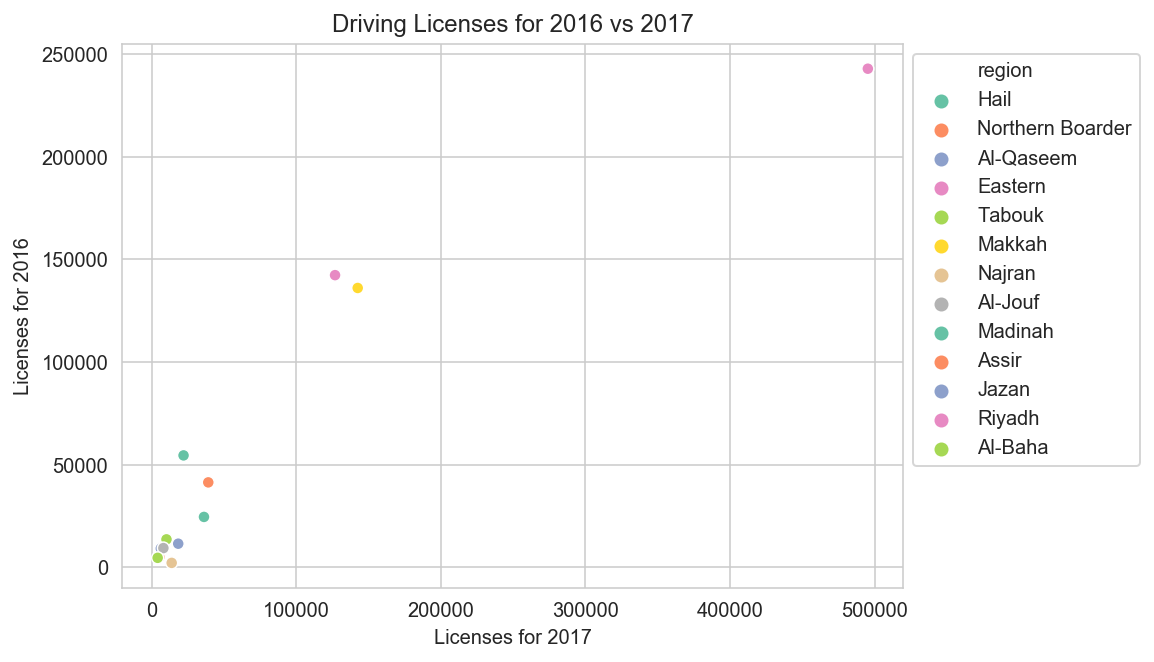

In [138]:
#Driving Licenses for 2016 vs 2017

y2016_lice = combined.loc[combined['year']==2016 , ['region','no._of_liceses'] ]
y2017_lice = combined.loc[combined['year']==2017 , ['region','no._of_liceses']]


y2016_lice=pd.DataFrame(y2016_lice)
y2016_lice.reset_index(inplace=True)

y2017_lice=pd.DataFrame(y2017_lice)
y2017_lice.reset_index(inplace=True)

combined_years = pd.merge(y2017_lice,y2016_lice, how= 'outer' , on='region')


fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(x='no._of_liceses_x', y= 'no._of_liceses_y',
                palette='Set2', sizes=(10, 200),hue= 'region',data=combined_years)
plt.legend(bbox_to_anchor=(1,1), loc=2)


ax.set_xlabel('Licenses for 2017')
ax.set_ylabel('Licenses for 2016')
ax.set_title("Driving Licenses for 2016 vs 2017")

Text(0.5, 1.0, 'Traffic Accidents for 2016 vs 2017')

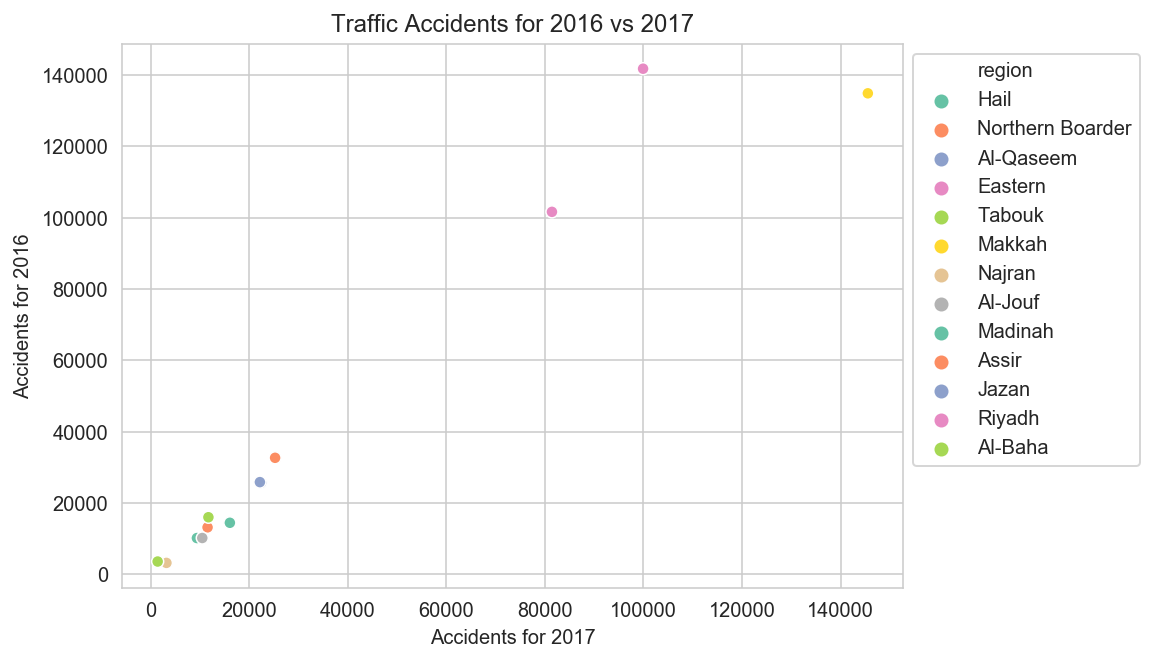

In [139]:
#Traffic Accidents for 2016 vs 2017

y2016_lice = combined.loc[combined['year']==2016 ,['region','No. of Accidents']]
y2017_lice = combined.loc[combined['year']==2017 , ['region','No. of Accidents']]
y2016_lice=pd.DataFrame(y2016_lice)
y2016_lice.reset_index(inplace=True)

y2017_lice=pd.DataFrame(y2017_lice)
y2017_lice.reset_index(inplace=True)

combined_years = pd.merge(y2017_lice,y2016_lice, how= 'outer' , on='region')

fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(x='No. of Accidents_x', y='No. of Accidents_y',
                     palette='Set2', sizes=(10, 200),hue= 'region',data=combined_years)
plt.legend(bbox_to_anchor=(1,1), loc=2)


ax.set_xlabel('Accidents for 2017')
ax.set_ylabel('Accidents for 2016')
ax.set_title("Traffic Accidents for 2016 vs 2017")

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'Number of licenses and accidents boxplot')

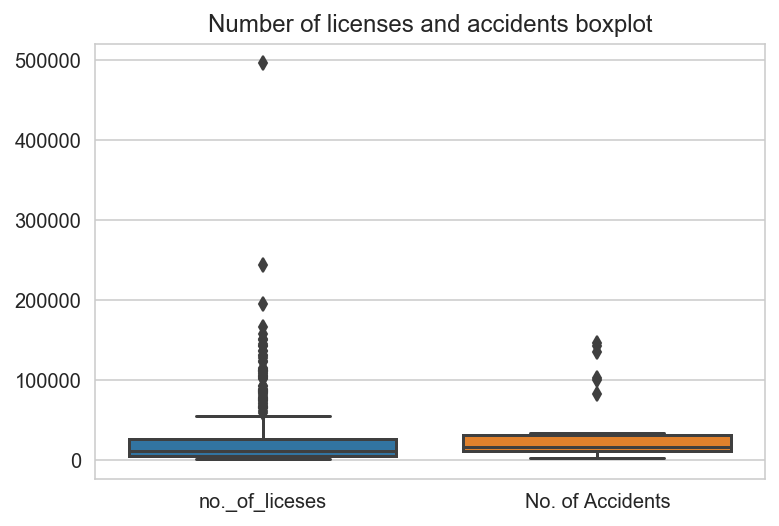

In [147]:
# Code
import seaborn as sns

new = combined[['no._of_liceses','No. of Accidents']]
# Plot the orbital period with horizontal boxes
sns.boxplot(data=new).set_title("Number of licenses and accidents boxplot")


Text(0.5, 1.0, 'Number of dead and Injured boxplot')

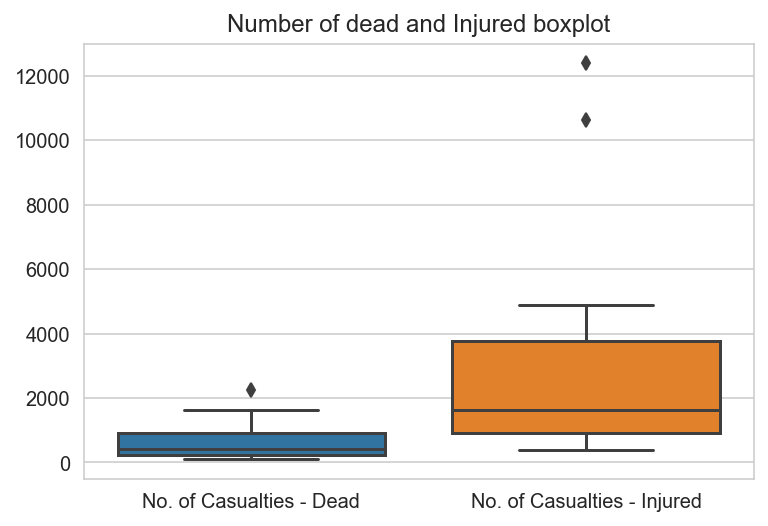

In [146]:
import seaborn as sns

new = combined[['No. of Casualties - Dead','No. of Casualties - Injured']]
sns.boxplot(data=new).set_title("Number of dead and Injured boxplot")


Text(0.5, 1.0, 'year boxplot')

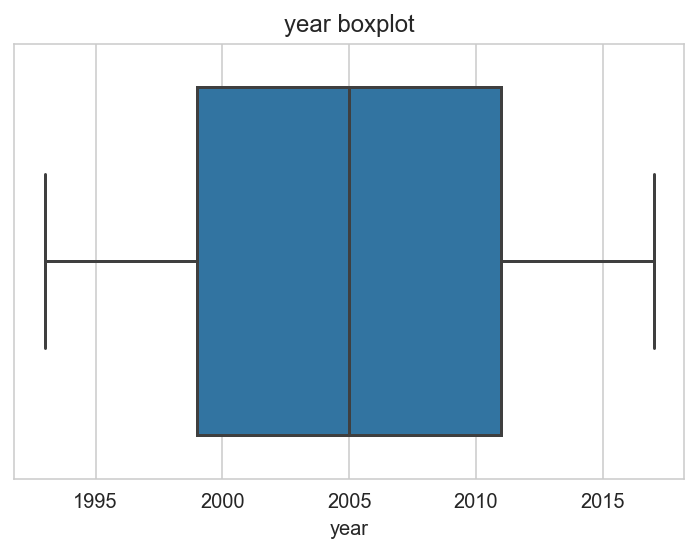

In [142]:
sns.boxplot(x='year',data=combined).set_title("year boxplot")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0.5, 0, 'Regions')

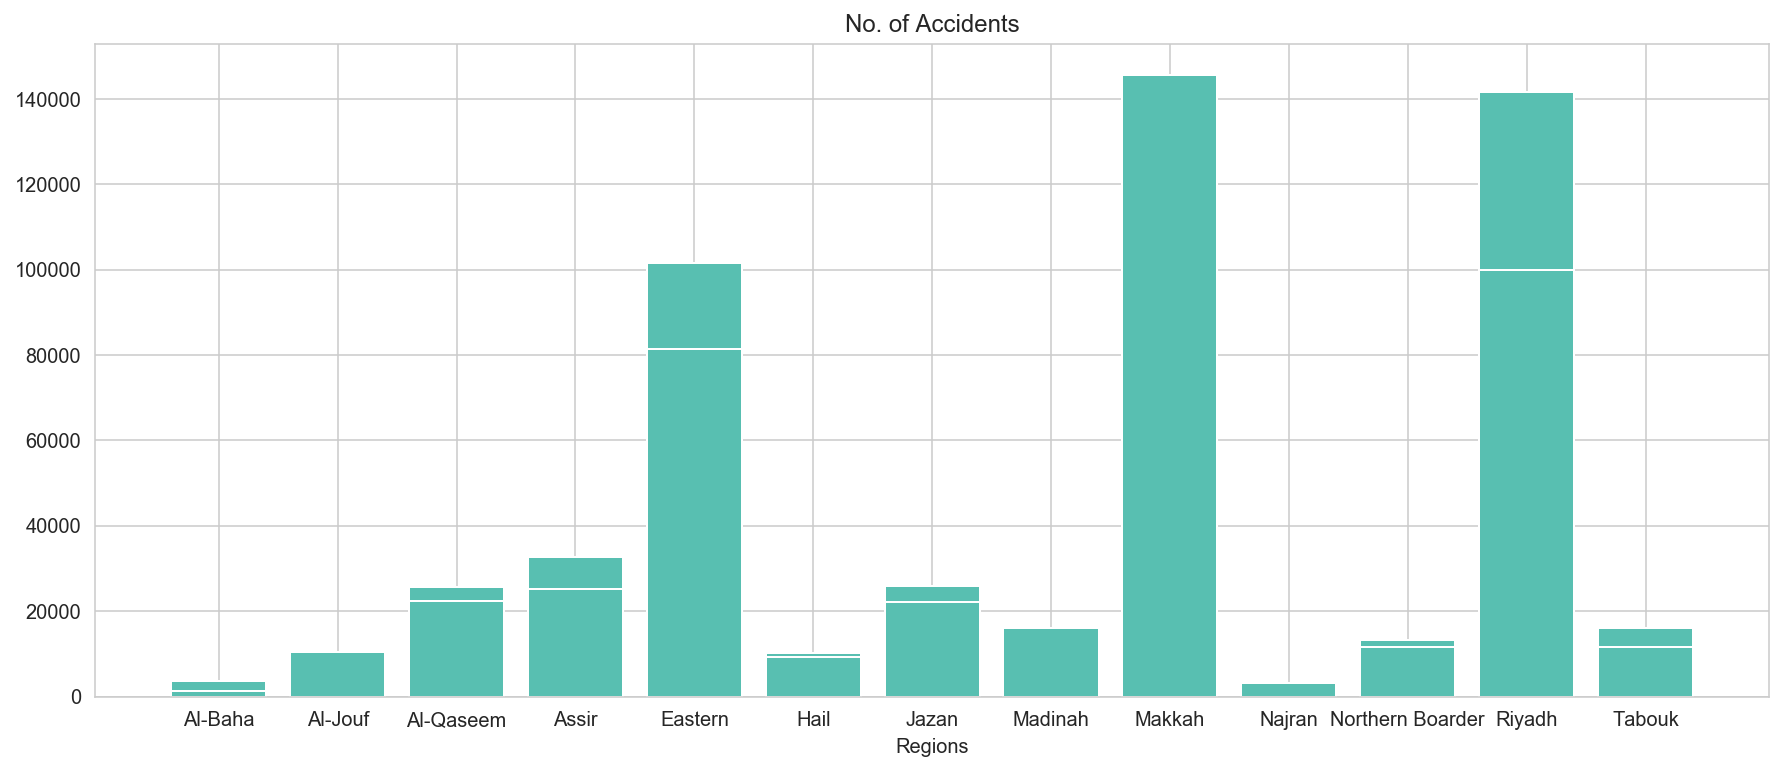

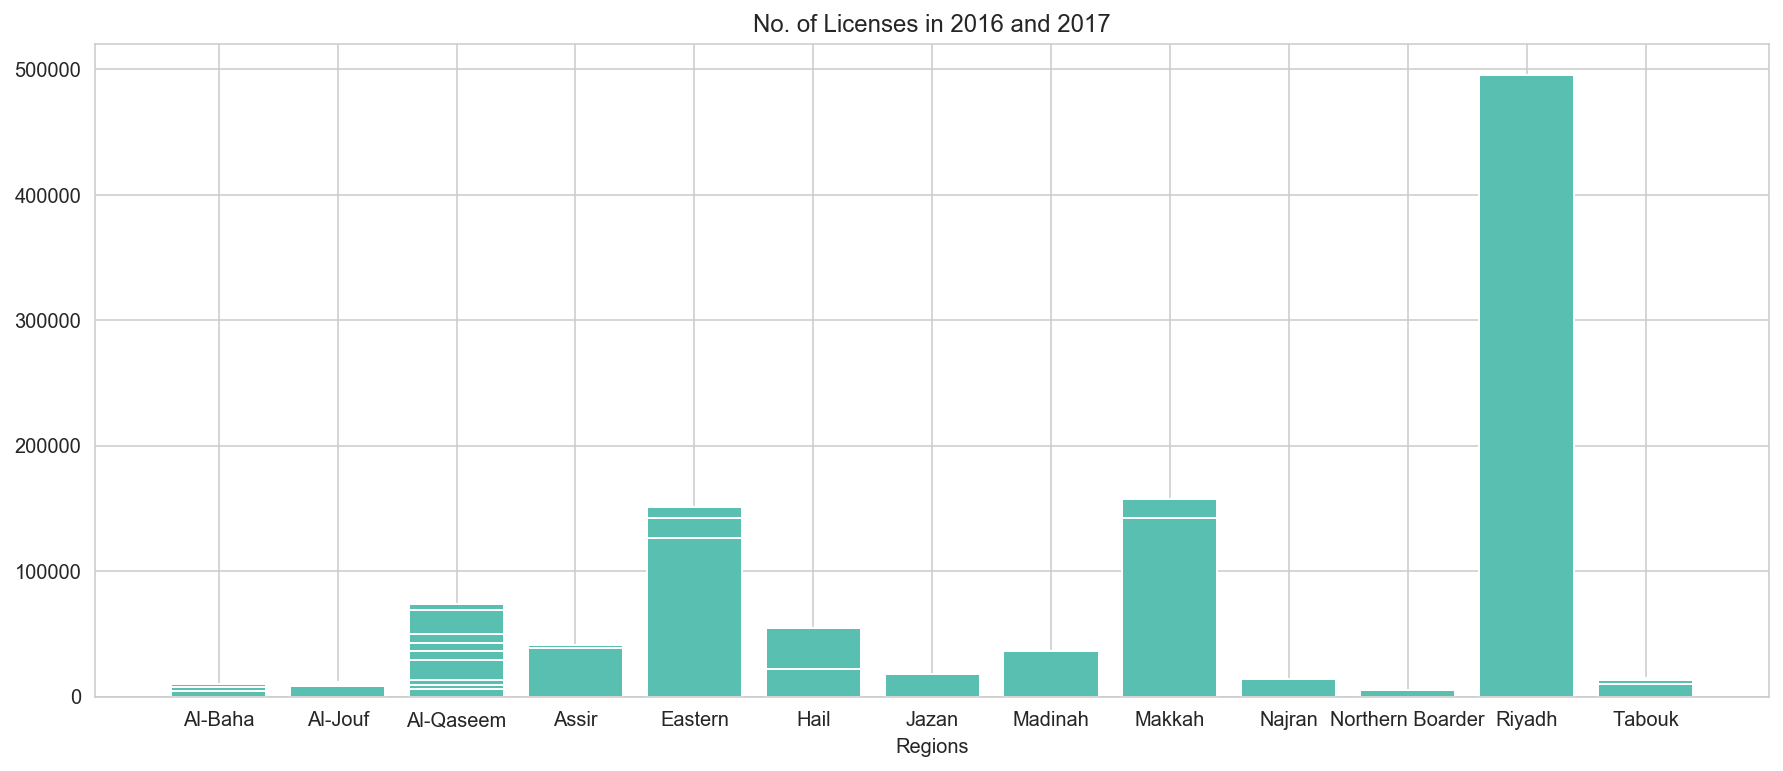

In [148]:
#Accedent 
ax= plt.subplots(figsize=(15,6))
ax= plt.bar(x='region', height='sum', data=df7,color= '#58bfb1')
plt.title('No. of Accidents')
plt.xlabel('Regions')
#Licenses
ax1= plt.subplots(figsize=(15,6))
ax1= plt.bar(x='region', height='sum', data=df3,color= '#58bfb1')
plt.title('No. of Licenses in 2016 and 2017')
plt.xlabel('Regions')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

<h3 style="color:#cc3300;">Answer:</h3>
<p style="color:#006600;">
Number of licenses, accidents, dead and injured
All are right-skewed distribution (also known as "positively skewed" distribution)which is mean that most data falls to the right, or positive side and the values of central tendency are mode < median < mean In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it<br>
below is summary of all statistics of the numeric column and you can ensure that mode is the smallest value and mean is the highest
</p>  

In [42]:
lice_mean= np.mean(combined['no._of_liceses'])
lice_median= np.median(combined['no._of_liceses'])
lice_mode= stats.mode(combined['no._of_liceses'])
lice_var=np.var(combined['no._of_liceses'])
lice_std=np.std(combined['no._of_liceses'])

print(f'Driving licenses mean: {lice_mean}\nDriving licenses median: {lice_median}\nDriving licenses mode: {lice_mode}\nDriving licenses variance: {lice_var}\nDriving licenses standard deviation: {lice_std}')
print('\n')

Driving licenses mean: 28915.347692307692
Driving licenses median: 10267.0
Driving licenses mode: ModeResult(mode=array([915]), count=array([1]))
Driving licenses variance: 2241648471.1929564
Driving licenses standard deviation: 47346.0502174464




In [43]:
acci_mean= np.mean(accidents['No. of Accidents'])
acci_median= np.median(accidents['No. of Accidents'])
acci_mode= stats.mode(accidents['No. of Accidents'])
acci_var=np.var(combined['No. of Accidents'])
acci_std=np.std(combined['No. of Accidents'])

print(f'Traffic Accidents mean: {lice_mean}\nTraffic Accidents median: {lice_median}\nTraffic Accidents mode: {lice_mode}\nTraffic Accidents variance: {lice_var}\nTraffic Accidents standard deviation: {lice_std}')
print('\n')

Traffic Accidents mean: 28915.347692307692
Traffic Accidents median: 10267.0
Traffic Accidents mode: ModeResult(mode=array([915]), count=array([1]))
Traffic Accidents variance: 2241648471.1929564
Traffic Accidents standard deviation: 47346.0502174464




In [44]:
dead_mean= np.mean(accidents['No. of Casualties - Dead'])
dead_median= np.median(accidents['No. of Casualties - Dead'])
dead_mode= stats.mode(accidents['No. of Casualties - Dead'])
dead_var=np.var(combined['No. of Casualties - Dead'])
dead_std=np.std(combined['No. of Casualties - Dead'])

print(f'No. of Dead mean: {lice_mean}\nNo. of Dead median: {lice_median}\nNo. of Dead mode: {lice_mode}\nNo. of Dead variance: {lice_var}\nNo. of Dead standard deviation: {lice_std}')
print('\n')

No. of Dead mean: 28915.347692307692
No. of Dead median: 10267.0
No. of Dead mode: ModeResult(mode=array([915]), count=array([1]))
No. of Dead variance: 2241648471.1929564
No. of Dead standard deviation: 47346.0502174464




In [45]:
lice_mean= np.mean(accidents['No. of Casualties - Injured'])
lice_median= np.median(accidents['No. of Casualties - Injured'])
lice_mode= stats.mode(accidents['No. of Casualties - Injured'])
lice_var=np.var(combined['No. of Casualties - Injured'])
lice_std=np.std(combined['No. of Casualties - Injured'])

print(f'No. of Injured mean: {lice_mean}\nNo. of Injured median: {lice_median}\nNo. of Injured mode: {lice_mode}\nNo. of Injured variance: {lice_var}\nNo. of Injured standard deviation: {lice_std}')

No. of Injured mean: 2743.0384615384614
No. of Injured median: 1618.5
No. of Injured mode: ModeResult(mode=array([374]), count=array([1]))
No. of Injured variance: 8213299.190828402
No. of Injured standard deviation: 2865.885411322023


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<h3 style="color:#cc3300;">Answer:</h3>

<p style="color:#006600;">No, not normally distributed</p>

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<h3 style="color:#cc3300;">Answer:</h3>

<p style="color:#006600;"> Driving licenses and  traffic accidents are right-skewed distribution since the mode < median < mean, so not having data that is normally distributed typically instills a lot of fear.
if it not normally distribution that is means high variance = overfitting </p>



## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<h3 style="color:#cc3300;">Answer:</h3>



The tables below shows five regions that demonstrate interesting trends in the number of driving licenses and traffic accidents


,region,No. of Accidents,.P.C
8,Makkah,280379.0,"(28.2, %)"
11,Riyadh,241661.0,"(24.3, %)"
4,Eastern,183052.0,"(18.4, %)"
3,Assir,57929.0,"(5.8, %)"
2,Al-Qaseem,48069.0,"(4.8, %)"


,region,no._of_liceses,.P.C
8,Makkah,2433659,"(25.9, %)"
11,Riyadh,2243304,"(23.9, %)"
4,Eastern,2147243,"(22.8, %)"
2,Al-Qaseem,562292,"(6.0, %)"
3,Assir,490615,"(5.2, %)"


Text(0.5, 0, 'Region')

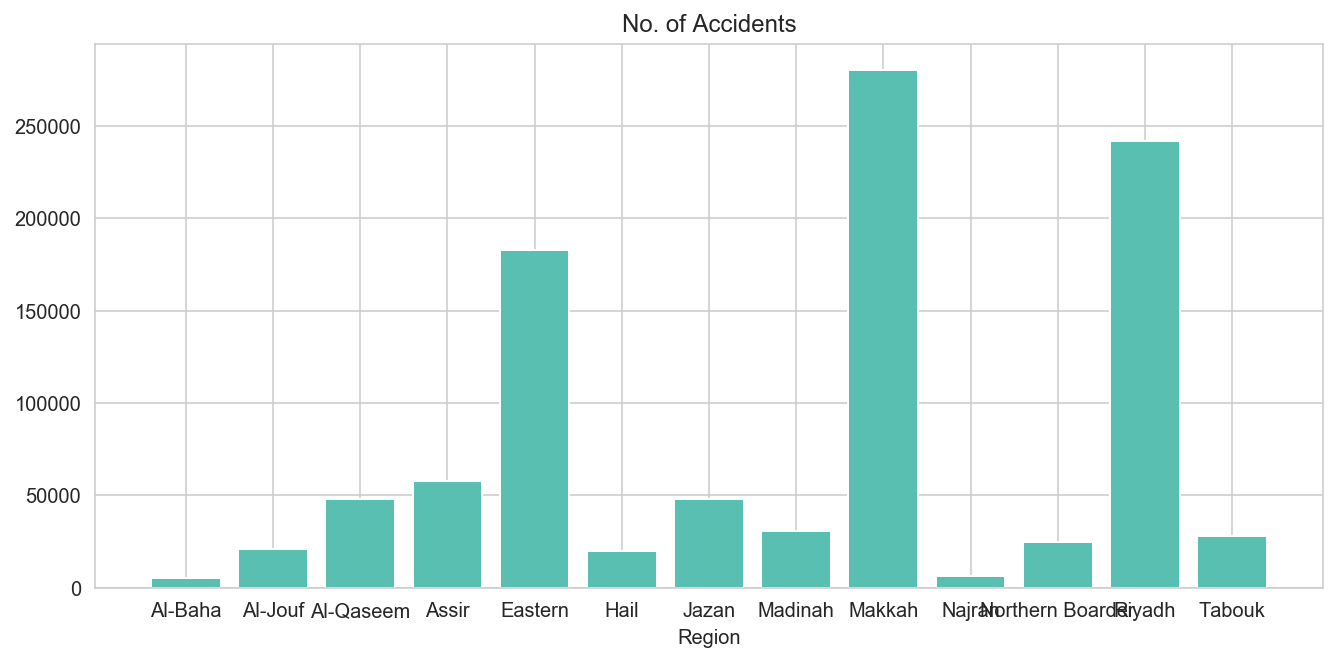

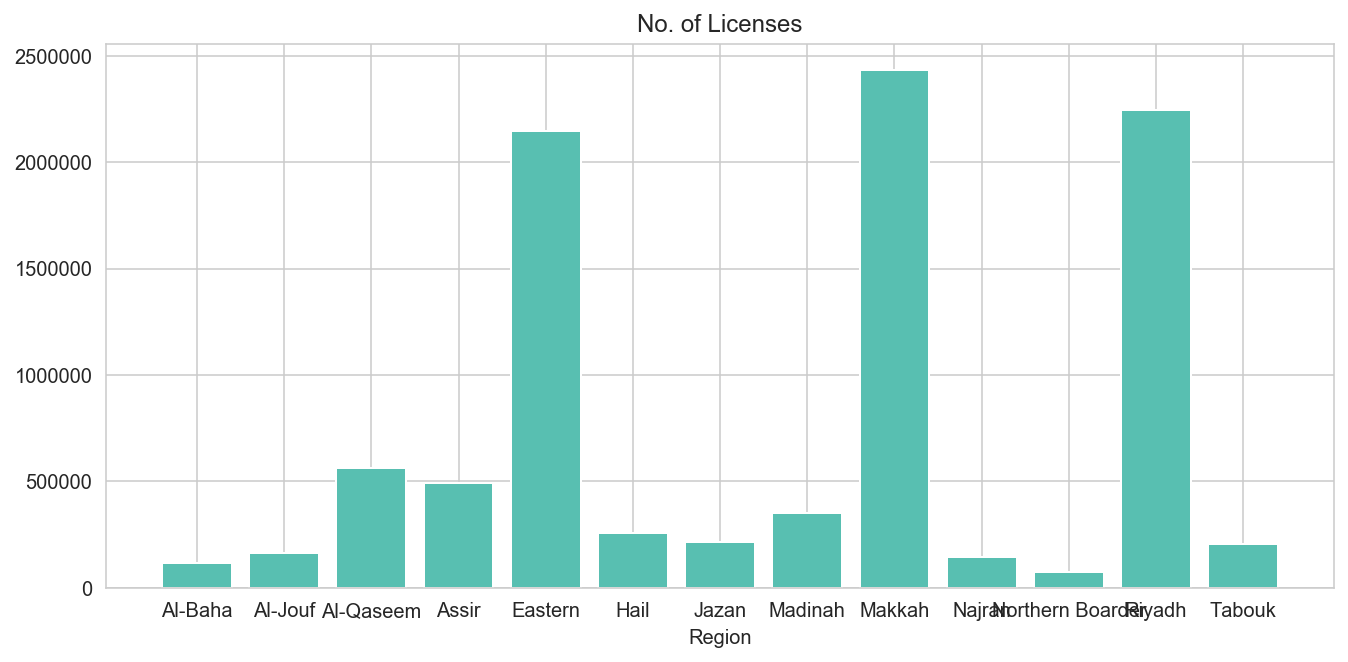

In [149]:
print ('The tables below shows five regions that demonstrate interesting trends in the number of driving licenses and traffic accidents')
percentage_acc= pd.DataFrame(combined.groupby('region')['No. of Accidents'].sum())
percentage_acc.reset_index(inplace=True)
def percentage(part):
    whole= percentage_acc['No. of Accidents'].sum()
    percentage= 100 * part/whole
    p=percentage.round(1)
    return p,'%'

percentage_acc['.P.C']= percentage_acc['No. of Accidents'].apply(lambda x : percentage(x))
display (percentage_acc.sort_values('No. of Accidents',ascending =False).head(5))
############
percentage_lic= pd.DataFrame(combined.groupby('region')['no._of_liceses'].sum())
percentage_lic.reset_index(inplace=True)
def percentage(part):
    whole= percentage_lic['no._of_liceses'].sum()
    percentage= 100 * part/whole
    p=percentage.round(1)
    return p,'%'

percentage_lic['.P.C']= percentage_lic['no._of_liceses'].apply(lambda x : percentage(x))
display (percentage_lic.sort_values('no._of_liceses',ascending =False).head(5))
#Accedent 
ax= plt.subplots(figsize=(11,5))
ax= plt.bar(x='region', height='No. of Accidents', data=percentage_acc,color= '#58bfb1')
plt.title('No. of Accidents')
plt.xlabel('Region')
#Licenses
ax1= plt.subplots(figsize=(11,5))
ax1= plt.bar(x='region', height='no._of_liceses', data=percentage_lic,color= '#58bfb1')
plt.title('No. of Licenses')
plt.xlabel('Region')



<p style="color:#006600;">In this research I will go through the population and its relation with number of driving licenses and traffic accidents and where is the accidents happens and accidents caused then the impact of Saher system and Riyadh Metro
    
    
<p style="color:#006600;">Riyadh, Makkah and Eastern are the trend in number of driving licenses and traffic accidents also they have the highest population in Saudi Arabia as General Authority for Statistics recorded the population in Makkah is 6915006 and Riyadh 6777146 and Eastern 4105780, So there is a positive relation between the population and number of driving licenses and traffic accidents also number of accidents outside city is less than accidents inside the city, and Najm Insurance Services recorded that 90% of accidents caused is:<br></p>
 
 
<ul style="color:#006600;">
  <li>Using the phone </li>
  <li>Do not leave save space between cars</li>
  <li>Running A Red Traffic Light</li>
  <li>Change the path in road suddenly</li>
  <li>Commit with priority of traffic in round roundabout</li>
</ul>

<p style="color:#006600;">In addition Saher was decreased the traffic accidents, the General Department of Traffic in Saudi Arabia recorder that traffic accidents increased to 23% in Riyadh city and 35% in Jeddah city, In Makkah region the situation is different because of Hajj season and Ramadan month as General Department of Traffic mentionedthe increase of number of dead caused by traffic accident in these season when the Makkah region be crowded, and assumption that after Riyadh Metro works the number of accident will decrease, in 2018 Transport Ministryrecorded decreasing in number of traffic accident to 33% compared to 2017 after the trains between cities and that ensures that Metros inside cities will decrease it too. </p>


## Conclusions and Recommendations

- Based on your exploration of the data, what are you key take aways and recommendations?
- Are there additional data you desire that would better inform your investigations?

<h3 style="color:#cc3300;">Answer:</h3>

<p style="color:#006600;">There is a strong relationship between the number of licenses issued and the number of accidents so I recommend reviewing the way in which drivers are issued licenses is the driver really qualified to drive, also to tighten and impose sanctions on those who violate traffic safety regulations It is very important to establish a public transport network in Makkah and the eastern region because of its importance in reducing traffic accidents</p>

<p style="color:#006600;">The additional data  that I desire that would better inform my investigations: <br>Reasons, Type of accidents, City, Time, Type of car, Drivers age, Gender, Nationality</p>